## Reference

Module 2: Introduction to TensorFlow - https://colab.research.google.com/drive/1F_EWVKa8rbMXi3_fG0w7AtcscFq7Hi7B#forceEdit=true&sandboxMode=true
<br>📗 Module 3: Core Learning Algorithms - https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true
<br>📘 Module 4: Neural Networks with TensorFlow -   
https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true
<br>📙 Module 5: Deep Computer Vision - https://colab.research.google.com/drive/1ZZXnCjFEOkp_KdNcNabd14yok0BAIuwS#forceEdit=true&sandboxMode=true
<br>📔 Module 6: Natural Language Processing with RNNs -  https://colab.research.google.com/drive/1ysEKrw_LE2jMndo1snrZUh5w87LQsCxk#forceEdit=true&sandboxMode=true
<br>📒 Module 7: Reinforcement Learning - https://colab.research.google.com/drive/1IlrlS3bB8t1Gd5Pogol4MIwUxlAjhWOQ#forceEdit=true&sandboxMode=true


# CNN : Convolutional Neural Networks

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 11s 0us/step


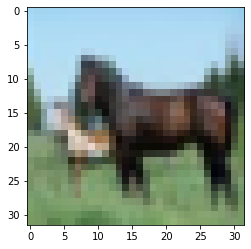

In [3]:
plt.imshow(train_images[12])

In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
train_images.shape

(50000, 32, 32, 3)

## CNN Architecture

Explanation of filters, strides and pooling is in video
https://www.youtube.com/watch?v=tPYj3fFJGjk

In [6]:
model1=models.Sequential()
model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Conv2D(64,(3,3),activation='relu'))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Conv2D(64,(3,3),activation='relu'))


2022-09-02 18:07:23.878768: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


## Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.



In [8]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64,activation='relu'))
model1.add(layers.Dense(10))

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [10]:
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy']
              )

history=model1.fit(train_images,train_labels,epochs=4,
                  validation_data=(test_images,test_labels)
                  )

2022-09-02 18:07:26.511802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5282 - accuracy: 0.4405 - val_loss: 1.2539 - val_accuracy: 0.5445
Epoch 2/4
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1689 - accuracy: 0.5859 - val_loss: 1.0635 - val_accuracy: 0.6286
Epoch 3/4
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0244 - accuracy: 0.6413 - val_loss: 0.9739 - val_accuracy: 0.6610
Epoch 4/4
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9321 - accuracy: 0.6732 - val_loss: 0.9609 - val_accuracy: 0.6731


Here 1563 is total batches, by default batch size is 32, so total batch = no. of examples/ batch_size = 50000/32 = 1563

In [11]:
model1.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.9609 - accuracy: 0.6731


[0.9608883857727051, 0.6730999946594238]

## Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images. 

### Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes. 

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.



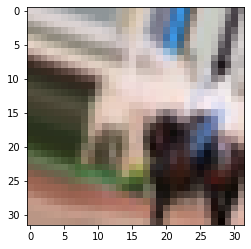

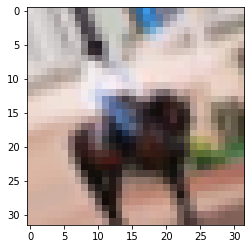

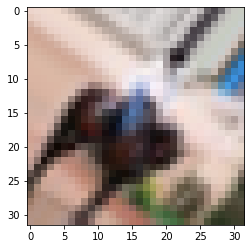

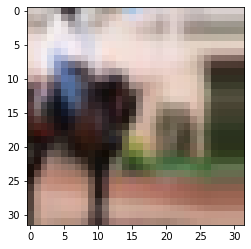

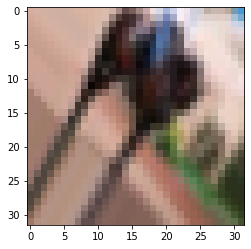

In [12]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

#pick any image
test_img=train_images[11]
img=image.img_to_array(test_img) #convert to numpy array
img=img.reshape((1,)+img.shape)

i=0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

This way you can generate more data from existing data

### Pretrained Models
You would have noticed that the model above takes a few minutes to train in the NoteBook and only gives an accuaracy of ~70%. This is okay but surely there is a way to improve on this. 

In this section we will talk about using a pretrained CNN as apart of our own custom network to improve the accuracy of our model. We know that CNN's alone (with no dense layers) don't do anything other than map the presence of features from our input. This means we can use a pretrained CNN, one trained on millions of images, as the start of our model. This will allow us to have a very good convolutional base before adding our own dense layered classifier at the end. In fact, by using this techique we can train a very good classifier for a realtively small dataset (< 10,000 images). This is because the convnet already has a very good idea of what features to look for in an image and can find them very effectively. So, if we can determine the presence of features all the rest of the model needs to do is determine which combination of features makes a specific image.



### Fine Tuning
When we employ the technique defined above, we will often want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional base but only adjusting the final few. We do this because the first layers in our base are very good at extracting low level features lile lines and edges, things that are similar for any kind of image. Where the later layers are better at picking up very specific features like shapes or even eyes. If we adjust the final layers than we can look for only features relevant to our very specific problem.



In [13]:
from tensorflow import keras

In [14]:
# Loading dataset
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

2022-09-02 18:09:33.922854: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


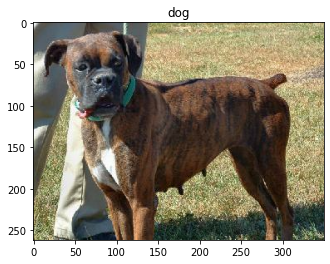

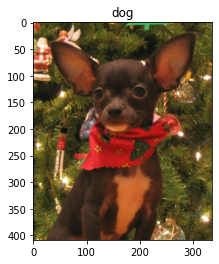

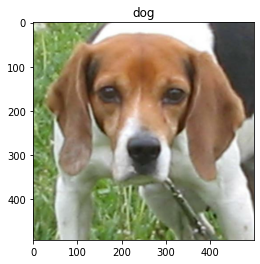

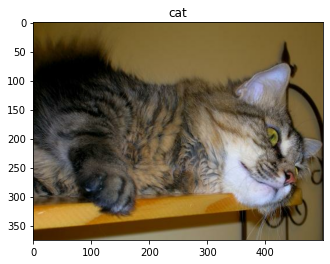

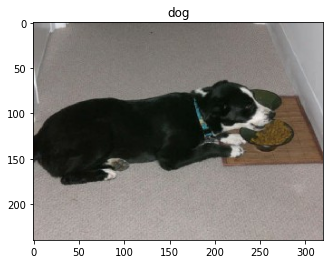

In [15]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

### Data Preprocessing
Since the sizes of our images are all different, we need to convert them all to the same size. We can create a function that will do that for us below.



In [16]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
    """
    returns an image that is reshaped to IMG_SIZE
    """
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1  #127.5 is half of 255
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [17]:
train=raw_train.map(format_example)
validation=raw_validation.map(format_example)
test=raw_test.map(format_example)

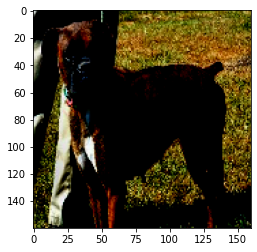

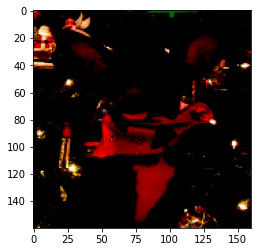

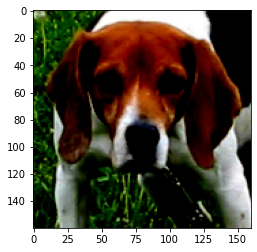

In [18]:
for image,label in train.take(3):
    plt.figure()
    plt.imshow(image)

In [19]:
#Shuffle and batch images
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [20]:
for img, label in raw_train.take(2):
    print("Original shape:", img.shape)

for img, label in train.take(2):
    print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


### Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).



In [21]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, #this dot include 1000 classes its trained on, because we will train it for cats and dogs 
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [22]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

In [23]:
#shows shape of output image
for image, _ in train_batches.take(1):
    pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


### Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.



In [24]:
base_model.trainable=False

In [25]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

Now total Trainable params are 0

### Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  



In [26]:
global_average_layer=tf.keras.layers.GlobalAveragePooling2D()

In [27]:
prediction_layer=keras.layers.Dense(1)

In [28]:
model=tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


### Training the Model
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.

In [30]:

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
initial_epochs=3
validation_steps=20

loss0,accuracy0=model.evaluate(validation_batches,steps=validation_steps)

 4/20 [=====>........................] - ETA: 3s - loss: 0.7698 - accuracy: 0.5156

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


16/20 [=======================>......] - ETA: 1s - loss: 0.7357 - accuracy: 0.5078

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


20/20 [==============================] - 7s 243ms/step - loss: 0.7369 - accuracy: 0.5078


In [32]:
history=model.fit(train_batches,
                 epochs=initial_epochs,
                 validation_data=validation_batches)

Epoch 1/3
167/582 [=======>......................] - ETA: 1:28 - loss: 0.3772 - accuracy: 0.8009

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 1:20 - loss: 0.3493 - accuracy: 0.8238

209/582 [=========>....................] - ETA: 1:18 - loss: 0.3415 - accuracy: 0.8294

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 1:03 - loss: 0.2957 - accuracy: 0.8594

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 19s - loss: 0.2173 - accuracy: 0.9039

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 16s - loss: 0.2139 - accuracy: 0.9056

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 14s - loss: 0.2109 - accuracy: 0.9073

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 8s - loss: 0.2050 - accuracy: 0.9105

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 7s - loss: 0.2036 - accuracy: 0.9113

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.1966 - accuracy: 0.9148

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 140s 232ms/step - loss: 0.1966 - accuracy: 0.9148 - val_loss: 0.0852 - val_accuracy: 0.9733
Epoch 2/3
166/582 [=======>......................] - ETA: 1:25 - loss: 0.0778 - accuracy: 0.9753

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/582 [=========>....................] - ETA: 1:17 - loss: 0.0786 - accuracy: 0.9750

209/582 [=========>....................] - ETA: 1:16 - loss: 0.0778 - accuracy: 0.9752

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


281/582 [=============>................] - ETA: 1:01 - loss: 0.0771 - accuracy: 0.9743

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 19s - loss: 0.0719 - accuracy: 0.9758

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 16s - loss: 0.0727 - accuracy: 0.9755

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 14s - loss: 0.0726 - accuracy: 0.9755

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


540/582 [==========================>...] - ETA: 8s - loss: 0.0722 - accuracy: 0.9755

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


546/582 [===========================>..] - ETA: 7s - loss: 0.0719 - accuracy: 0.9756

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9758

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 136s 232ms/step - loss: 0.0707 - accuracy: 0.9758 - val_loss: 0.0634 - val_accuracy: 0.9759
Epoch 3/3
166/582 [=======>......................] - ETA: 1:31 - loss: 0.0590 - accuracy: 0.9812

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


198/582 [=========>....................] - ETA: 1:24 - loss: 0.0600 - accuracy: 0.9806

208/582 [=========>....................] - ETA: 1:21 - loss: 0.0603 - accuracy: 0.9799

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


280/582 [=============>................] - ETA: 1:05 - loss: 0.0606 - accuracy: 0.9785

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


489/582 [========================>.....] - ETA: 20s - loss: 0.0578 - accuracy: 0.9792

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


502/582 [========================>.....] - ETA: 17s - loss: 0.0579 - accuracy: 0.9792

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


513/582 [=========================>....] - ETA: 14s - loss: 0.0578 - accuracy: 0.9792

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


539/582 [==========================>...] - ETA: 9s - loss: 0.0576 - accuracy: 0.9794

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


545/582 [===========================>..] - ETA: 7s - loss: 0.0577 - accuracy: 0.9793

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.0575 - accuracy: 0.9793

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 141s 239ms/step - loss: 0.0575 - accuracy: 0.9793 - val_loss: 0.0562 - val_accuracy: 0.9785


In [33]:
model.evaluate(test_batches)

27/73 [==========>...................] - ETA: 9s - loss: 0.0601 - accuracy: 0.9815

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


73/73 [==============================] - 15s 196ms/step - loss: 0.0515 - accuracy: 0.9819


[0.05154825747013092, 0.9819432497024536]

In [34]:
y_pred=model.predict(test_batches)

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


In [35]:
#you can Save model
model.save("dogs_vs_cats.h5")

#load saved model
new_model=tf.keras.models.load_model("dogs_vs_cats.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Object Detection
If you'd like to learn how you can perform object detection and recognition with tensorflow check out the guide below.

https://github.com/tensorflow/models/tree/master/research/object_detection